In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# read a CSV into a dataframe (adjust filename as needed)
events_filename = './data/event.csv'  # or provide a full path

if not os.path.exists(events_filename):
    csv_files = [f for f in os.listdir('.') if f.lower().endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError(f"{events_filename!r} not found and no CSV files in the current directory.")
    filename = csv_files[0]
    print(f"No file named 'data.csv' found. Using first CSV in cwd: {filename}")

events = pd.read_csv(events_filename)
print(f"Loaded {len(events)} rows and {len(events.columns)} columns from {events_filename}")
events.head()

Loaded 107738 rows and 14 columns from ./data/event.csv


/var/folders/_b/sl_t4k5539781f29qf723b080000gn/T/ipykernel_50579/2221732598.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_filename)


,type,inPlay,isStrike,isBall,pitcherName,catcherName,batterName,pitchCode,pitchType,velocity,coordX,coordY,runners,PAId
0,PITCH,False,False,True,徐若熙,蔣少宏,陳晨威,B,FF,145,71.11,-91.43,[],NaN
1,PITCH,True,True,False,徐若熙,蔣少宏,陳晨威,H,FF,147,54.86,42.67,"[{'type': 'PA', 'runnerName': '陳晨威', 'isOut': ...",NaN
2,PITCH,False,True,False,徐若熙,蔣少宏,林立,F,FF,145,54.86,22.35,[],NaN
3,PITCH,False,True,False,徐若熙,蔣少宏,林立,SW,SL,135,-2.03,-56.89,[],NaN
4,PITCH,False,False,True,徐若熙,蔣少宏,林立,B,SL,139,-34.54,-144.25,[],NaN


In [9]:
# read a CSV into a dataframe (adjust filename as needed)
pa_filename = './data/pa.csv'  # or provide a full path

if not os.path.exists(pa_filename):
    csv_files = [f for f in os.listdir('.') if f.lower().endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError(f"{pa_filename!r} not found and no CSV files in the current directory.")
    filename = csv_files[0]
    print(f"No file named 'data.csv' found. Using first CSV in cwd: {filename}")



pas = pd.read_csv(pa_filename, usecols=['inning', 'batterName', 'batterHand', 'pitcherName', 'pitcherHand', 'catcherName', 'paRound', 'pitchCodes', 'result'])
print(f"Loaded {len(pas)} rows and {len(pas.columns)} columns from {pa_filename}")
pas.head()


Loaded 27600 rows and 9 columns from ./data/pa.csv


,inning,batterName,batterHand,pitcherName,pitcherHand,catcherName,paRound,pitchCodes,result
0,1,陳晨威,L,徐若熙,R,蔣少宏,1,"['B', 'H']",GO
1,1,林立,R,徐若熙,R,蔣少宏,1,"['F', 'SW', 'B', 'B', 'S']",SO
2,1,梁家榮,L,徐若熙,R,蔣少宏,1,"['S', 'F', 'B', 'H']",2B
3,1,廖健富,L,徐若熙,R,蔣少宏,1,"['B', 'H']",1B
4,2,朱育賢,L,徐若熙,R,蔣少宏,1,"['S', 'SW', 'H']",FO


In [10]:
print(pas.shape)

(27600, 9)


# Calculate AVG, OPS, etc.

## filter out non-PITCH type

In [11]:
### filter out non-PITCH type
test_pas = pas[(pas['batterName'] == '魔鷹') & (pas['result'] != 'IGNORE')]

In [12]:
print(test_pas.shape)
test_pas.head()

(494, 9)


,inning,batterName,batterHand,pitcherName,pitcherHand,catcherName,paRound,pitchCodes,result
73,2,魔鷹,L,徐基麟,R,徐博瑋,1,"['F', 'H']",1B
82,3,魔鷹,L,徐基麟,R,徐博瑋,2,"['B', 'B', 'SW', 'H']",FO
91,5,魔鷹,L,徐基麟,R,徐博瑋,3,"['B', 'B', 'B', 'B']",uBB
100,7,魔鷹,L,謝榮豪,R,徐博瑋,4,[],IBB
191,1,魔鷹,L,布雷克,R,張翔,1,"['S', 'F', 'F', 'F', 'F', 'H']",FO


## cumulated avg, ops, etc. (at some point, not the final one)

Final cumulative (last row):
AVG      0.293303
OBP      0.366397
SLG      0.565820
OPS      0.932217
whiff    0.258893
Name: 27171, dtype: float64


,inning,batterName,batterHand,pitcherName,pitcherHand,catcherName,paRound,pitchCodes,result,AVG,OBP,SLG,OPS,whiff
73,2,魔鷹,L,徐基麟,R,徐博瑋,1,"['F', 'H']",1B,1.000000,1.000000,1.000000,2.000000,0.000000
82,3,魔鷹,L,徐基麟,R,徐博瑋,2,"['B', 'B', 'SW', 'H']",FO,0.500000,0.500000,0.500000,1.000000,0.250000
91,5,魔鷹,L,徐基麟,R,徐博瑋,3,"['B', 'B', 'B', 'B']",uBB,0.500000,0.666667,0.500000,1.166667,0.250000
100,7,魔鷹,L,謝榮豪,R,徐博瑋,4,[],IBB,0.500000,0.750000,0.500000,1.250000,0.250000
191,1,魔鷹,L,布雷克,R,張翔,1,"['S', 'F', 'F', 'F', 'F', 'H']",FO,0.333333,0.600000,0.333333,0.933333,0.111111


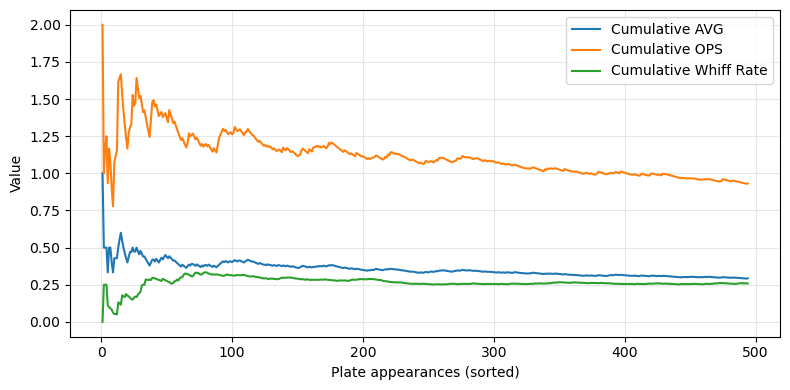

In [ ]:
# cumulative AVG / OPS over the plate appearances in test_pas
# Uses existing variables: test_pas, matplotlib.pyplot as plt, numpy as np, pandas as pd

# define result groups (keep consistent with earlier cells)
hits = {'1B', '2B', '3B', 'HR', 'IHR'}
bbs = {'uBB', 'IBB'}
hbps = {'HBP'}
non_ab_results = {'SH', 'SF', 'uBB', 'IBB', 'HBP', 'IH'}
tb_map = {'1B': 1, 'H': 1, '2B': 2, '3B': 3, 'HR': 4, 'IHR': 4}

# work on a sorted copy (chronological by game/inning/plate appearance)
df = test_pas.copy()

# # cumulative sums
cum_ab = (~df['result'].isin(non_ab_results)).astype(int).cumsum()
cum_non_ab = df['result'].isin(non_ab_results).astype(int).cumsum()
cum_hits = df['result'].isin(hits).astype(int).cumsum()
cum_BB = df['result'].isin(bbs).astype(int).cumsum()
cum_HBP = df['result'].isin(hbps).astype(int).cumsum()
cum_TB = df['result'].map(tb_map).fillna(0).astype(int).cumsum()
cum_PA = cum_ab + cum_non_ab  # plate appearances

# cumulative rates (avoid division by zero)
df['AVG'] = cum_hits / cum_ab.replace({0: np.nan})
# following earlier notebook convention: OBP = (H + BB + HBP) / PA
df['OBP'] = (cum_hits + cum_BB + cum_HBP) / cum_PA.replace({0: np.nan})
df['SLG'] = cum_TB / cum_ab.replace({0: np.nan})
df['OPS'] = df['OBP'] + df['SLG']
# count pitches and SWs per plate appearance (handles list-like or string representations)
def _count_items(codes):
    if pd.isna(codes):
        return 0
    if isinstance(codes, (list, tuple)):
        return len(codes)
    s = str(codes).strip()
    if s.startswith('[') and s.endswith(']'):
        inner = s[1:-1].strip()
        if inner == '':
            return 0
        parts = [p.strip() for p in inner.split(',') if p.strip() != '']
        return len(parts)
    return 1

def _count_sw(codes):
    if pd.isna(codes):
        return 0
    if isinstance(codes, (list, tuple)):
        return sum(1 for p in codes if str(p).strip().upper() == 'SW')
    s = str(codes).strip()
    if s.startswith('[') and s.endswith(']'):
        inner = s[1:-1].strip()
        if inner == '':
            return 0
        parts = [p.strip().strip("'\"").upper() for p in inner.split(',') if p.strip() != '']
        return sum(1 for p in parts if p == 'SW')
    return 1 if s.upper() == 'SW' else 0


def _count_sw(codes):
    if pd.isna(codes):
        return 0
    if isinstance(codes, (list, tuple)):
        return sum(1 for p in codes if str(p).strip().upper() == 'SW')
    s = str(codes).strip()
    if s.startswith('[') and s.endswith(']'):
        inner = s[1:-1].strip()
        if inner == '':
            return 0
        parts = [p.strip().strip("'\"").upper() for p in inner.split(',') if p.strip() != '']
        return sum(1 for p in parts if p == 'SW')
    return 1 if s.upper() == 'SW' else 0

# count swings per PA (include SW, F, FT, FOUL_BUNT, TRY_BUNT, BUNT, H)
_swing_tokens = {'SW', 'F', 'FT', 'FOUL_BUNT', 'TRY_BUNT', 'BUNT', 'H'}

def _count_swing(codes):
    if pd.isna(codes):
        return 0
    if isinstance(codes, (list, tuple)):
        return sum(1 for p in codes if str(p).strip().strip("'\"").upper() in _swing_tokens)
    s = str(codes).strip()
    if s.startswith('[') and s.endswith(']'):
        inner = s[1:-1].strip()
        if inner == '':
            return 0
        parts = [p.strip().strip("'\"").upper() for p in inner.split(',') if p.strip() != '']
        return sum(1 for p in parts if p in _swing_tokens)
    return 1 if s.strip().strip("'\"").upper() in _swing_tokens else 0


df['whiff'] = df['pitchCodes'].apply(_count_sw).cumsum() / df['pitchCodes'].apply(_count_swing).cumsum().replace({0: np.nan})
# show final cumulative values and a small sample
print("Final cumulative (last row):")
print(df[['AVG','OBP','SLG','OPS', 'whiff']].iloc[-1])

# optional: plot running AVG and OPS
plt.figure(figsize=(8,4))
plt.plot(cum_PA, df['AVG'], label='Cumulative AVG')
plt.plot(cum_PA, df['OPS'], label='Cumulative OPS')
plt.plot(cum_PA, df['whiff'], label='Cumulative Whiff Rate')
plt.xlabel('Plate appearances (sorted)')
plt.ylabel('Value')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# keep df available for further inspection
df.head()